In [9]:
import sys
sys.path.insert(0, '../')
import data_loader as dl
dir = '/Users/julian/temp/vessels_tests'
clinical_inputs, ct_inputs, ct_lesion_GT, mri_inputs, mri_lesion_GT, brain_masks, ids, params = dl.load_structured_data(dir, 'data_set.npz')


Loading a total of 113 subjects.
Sequences used: {'ct_sequences': ['wmask_filtered_extracted_betted_Angio'], 'ct_label_sequences': ['wcoreg_VOI'], 'mri_sequences': [], 'mri_label_sequences': []}
0 subjects had been excluded.


In [14]:
import numpy as np
import giotto.homology as hl
from plotting import plot_diagram, plt_diagram


In [15]:
test = np.squeeze(ct_inputs[0])
inp = np.asarray([np.asarray(np.where(test == 1)).T])


In [ ]:
homologyDimensions = (0, 1 ,2)
persistenceDiagram = hl.VietorisRipsPersistence(metric='euclidean', max_edge_length=10, 
                                                homology_dimensions=homologyDimensions, 
                                                n_jobs=-1)
persistenceDiagram.fit(inp)

# List of all the time-pordered persistent diagrams obtained from the list of correlation matrices
Diagrams = persistenceDiagram.transform(inp)
Diagrams.shape


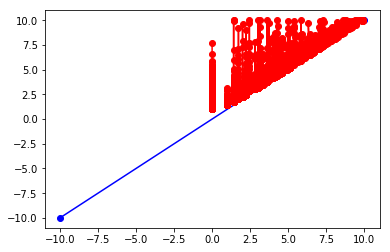

In [34]:
plt_diagram(Diagrams[0])



In [16]:
from giotto.meta_transformers import EntropyGenerator as eg
homologyDimensions = (0, 1 ,2)
ent = eg(metric='euclidean', max_edge_length=10, 
            homology_dimensions=homologyDimensions, 
            n_jobs=-1)
ent


EntropyGenerator(filter_epsilon=0.0, homology_dimensions=(0, 1, 2),
                 max_edge_length=10, metric='euclidean', n_jobs=-1,
                 scaler_function=<function amax at 0x10c3e17b8>,
                 scaler_metric='bottleneck', scaler_metric_params=None)

In [8]:
import time
t0 = time.time()
inp_entropy = ent.fit_transform(inp)
t1 = time.time()
print(inp_entropy)
print(t1-t0)

[[9.09230131 7.79440413 5.09142905]]
213.73709416389465


In [22]:
inp_entropy[0][1]


7.794404131281391